In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
#Read xlsx files into DF
startups = pd.read_excel('/content/P11-1000-Startups.xlsx')
Financials = pd.read_excel('/content/P11-1000-Startups.xlsx', sheet_name= 'Financials')

In [22]:
#Joining Dataframes into one DF
data = startups.join(Financials, on = 'ID', how = 'left', rsuffix = '_F')

In [23]:
data.drop(columns = ['ID_F','Name_F'], inplace = True)

In [24]:
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [25]:
data.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,5448571.0,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,2007778.0,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,1857830.0,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01


In [26]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0


In [27]:
Financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [28]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [29]:
industries = pd.DataFrame(industries)

In [30]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [31]:
industries

,Number
Industry,
IT Services,147
Health,88
Software,87
Business Products & Services,67
Advertising & Marketing,65
Financial Services,54
Government Services,50
Construction,49
Retail,48


Let's find the earliest founded startups each industry

In [32]:
earliest_startups = pd.DataFrame(columns = startups.columns.to_list())

In [33]:
earliest_startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees


In [34]:
industry_grup = startups.groupby('Industry')

In [35]:
# Find the earliest founded startup in each industry
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  earliest_startups = earliest_startups.append(the_min_year)

In [36]:
# Optional export data to xlsx file
earliest_startups.to_excel('earliest_startups.xlsx')

In [37]:
earliest_startups.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago,55.0
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT",95.0
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis,49.0


Let's check which industry hire the highest number of employees

In [38]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum]})

In [39]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [40]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [41]:
indus.reset_index(inplace = True)

In [42]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [43]:
indus

,Industry,Employees_Mean,Employees_Sum
0,Advertising & Marketing,55.0,3550
1,Business Products & Services,95.0,6367
2,Computer Hardware,49.0,196
3,Construction,58.0,2839
4,Consumer Products & Services,132.0,5928
5,Education,57.0,963
6,Energy,331.0,7273
7,Engineering,117.0,1983
8,Environmental Services,78.0,702
9,Financial Services,207.0,11191


Text(Health, 18000, 'Highest point - Health industry')

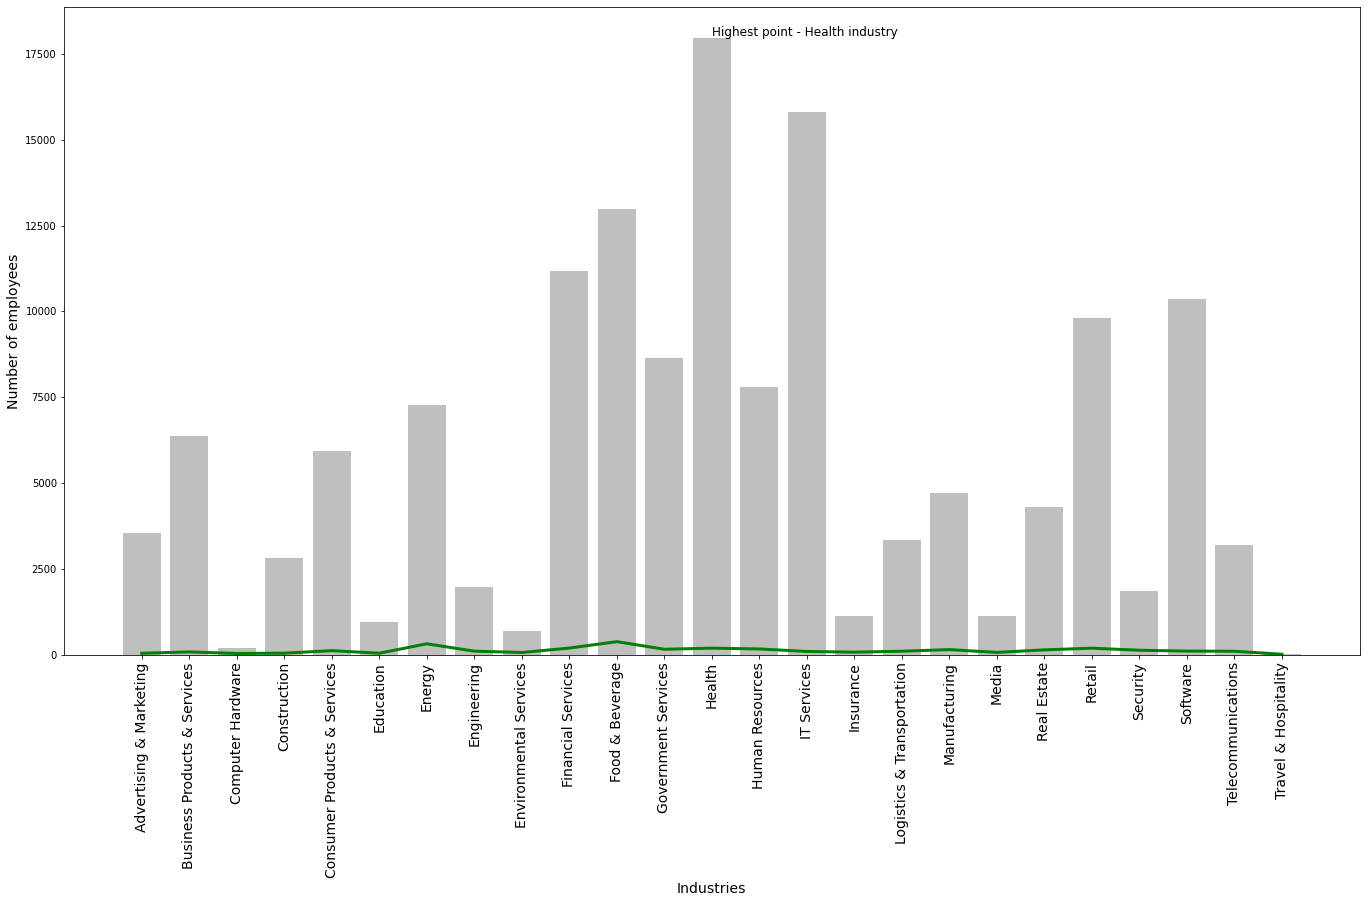

In [44]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1 = indus['Industry']
x2 = indus['Employees_Mean']
x3 = indus['Employees_Sum']
plt.xticks(rotation=90, size = 14) 
plt.ylabel('Number of employees', size = 14)
plt.xlabel('Industries', size = 14)
ax.plot(x1,x2, color = 'g', linewidth=3.0)
ax.bar(x1,x3, color = 'grey', alpha = 0.5)
ax.annotate('Highest point - Health industry', xy = ('Health', 18000), size = 12, color = 'black')

#plt.savefig('Chart_basic.png', dpi = 300)

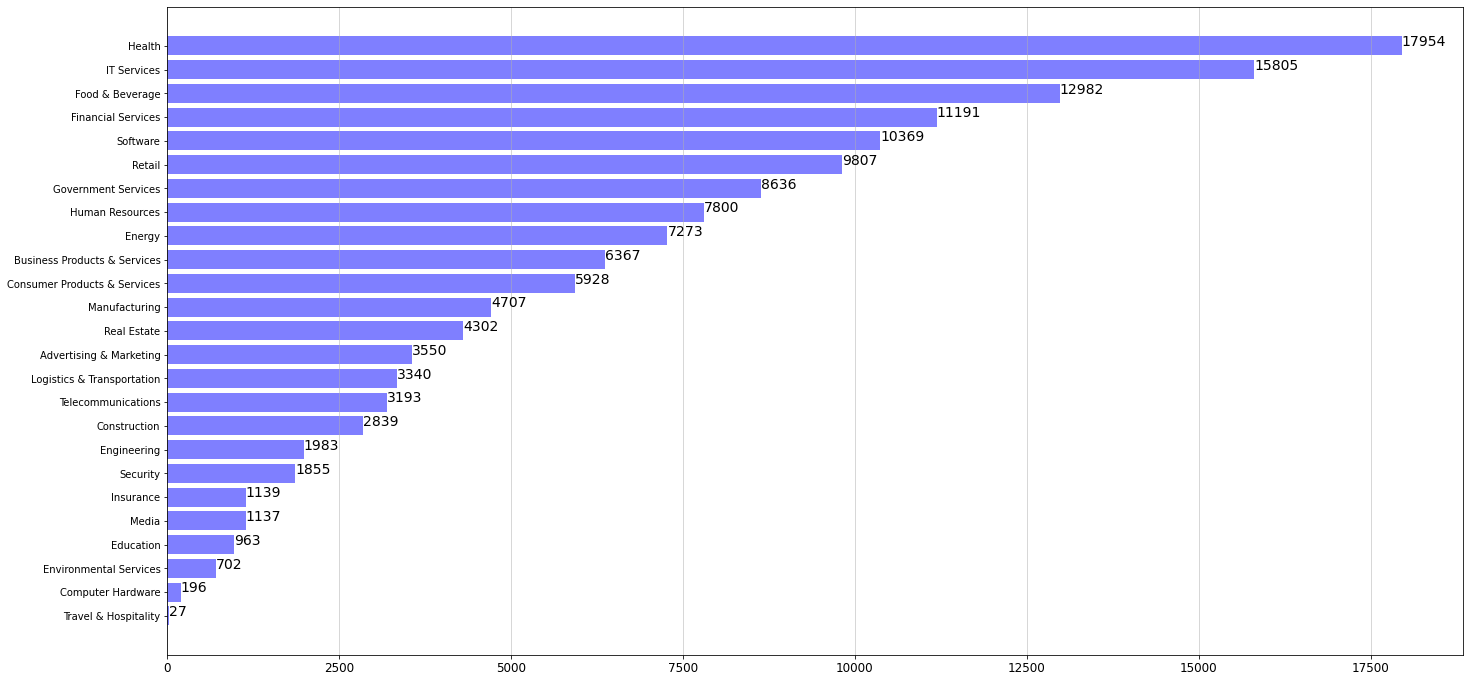

In [45]:
#Number of employess in each industry

fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
indus.sort_values(by = 'Employees_Sum', ascending=True, inplace = True)

x1 = indus['Industry']
x2 = indus['Employees_Sum']

for Index, Sum in enumerate(indus['Employees_Sum']):
    ax.annotate(Sum, xy = (Sum,Index), size = 14)

plt.barh(x1,x2, color = 'blue', alpha = 0.5)
ax.xaxis.grid(linestyle = '-', linewidth = 0.5)
plt.xticks(size = 12)
plt.show()




In [46]:
#indus.sort_values(by = 'Employees_Sum', ascending=False)

In [47]:
#Columns with 2015 data
#filter_col = [col for col in data if col.startswith('2015')]

Exploratory Data Analysis - Financial Data (2015)


In [48]:
#Base informations
Financials_2015 = data.iloc[0:,:13]

In [49]:
Financials_2015.isnull().sum()

ID                0
Name              0
Industry          0
Description       1
Year Founded      0
Employees         0
State             0
City              0
Metro Area       11
2015 Revenue      1
2015 Expenses     1
2015 Profit       1
2015 Growth %     1
dtype: int64

In [50]:
#The higest revenue in each industry

In [51]:
best_revenue_2015 = pd.DataFrame(columns = Financials_2015.columns)

In [52]:
financial_industry = Financials_2015.groupby('Industry')

In [53]:
for revenue, industry in financial_industry:
  higest_revenue = industry.nlargest(n=1, columns = '2015 Revenue')
  best_revenue_2015 = best_revenue_2015.append(higest_revenue)

In [54]:
best_revenue_2015['Avg_2015_Revenue'] = best_revenue_2015['2015 Revenue'].mean()

In [ ]:
best_revenue_2015['2015 Revenue'] - best_revenue_2015['Avg_2015_Revenue']

In [83]:
Financials_2015['Revenue_per_Emp'] = Financials_2015.groupby('Industry').apply(lambda x: x['2015 Revenue']/x['Employees']).reset_index(level = 0, drop = True).round(2)

In [97]:
Financials_2015['Revenue_per_Emp'] = Financials_2015['Revenue_per_Emp'].fillna(0)

In [103]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


In [119]:
Financials_2015.loc[:,['Industry','State']]

,Industry,State
0,Software,TN
1,IT Services,PA
2,Real Estate,IL
3,Retail,SC
4,Energy,WI
...,...,...
995,Construction,MN
996,Retail,TX
997,IT Services,MI
998,Education,CA
